# EDA

### Imports and load data

In [67]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings 
warnings.filterwarnings('ignore')

In [68]:
articles = pd.read_csv('./h-and-m-personalized-fashion-recommendations/articles.csv')
transactions = pd.read_csv('./h-and-m-personalized-fashion-recommendations/transactions_train.csv')
customers = pd.read_csv('./h-and-m-personalized-fashion-recommendations/customers.csv')

### Articles 

이 테이블은 H&M의 제품의 유형, 색상, 제품 그룹 및 기타 특성과 관련된 세부 정보를 포함하고 있다.



- article_id: 제품 id
- product_code, prod_name: 제품 코드 및 제품명
- product_type, product_type_name: 제품 타입 및 제품 타입명
- graphical_appearance_no, graphical_appearance_name: 패턴 넘버 및 패턴명
- colour_group_code, colour_group_name: 색상 및 색상명
- perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name: 추가된 색상 정보(색상명 및 색상 id)
- department_no, department_name: 카테고리의 고유 넘버 및 이름
- index_code, index_name: index 코드 및 이름
- index_group_no, index_group_name: 인덱스 그룹의 고유 넘버 및 이름
- section_no, section_name: 의류 섹션의 고유 넘버 및 이름
- garment_group_no, garment_group_name: 세부 카테고리 그룹의 고유 넘버 및 이름
- detail_desc: 세부 정보


In [69]:
articles.shape

(105542, 25)

In [78]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


먼저, index_name 으로 분류하였다.

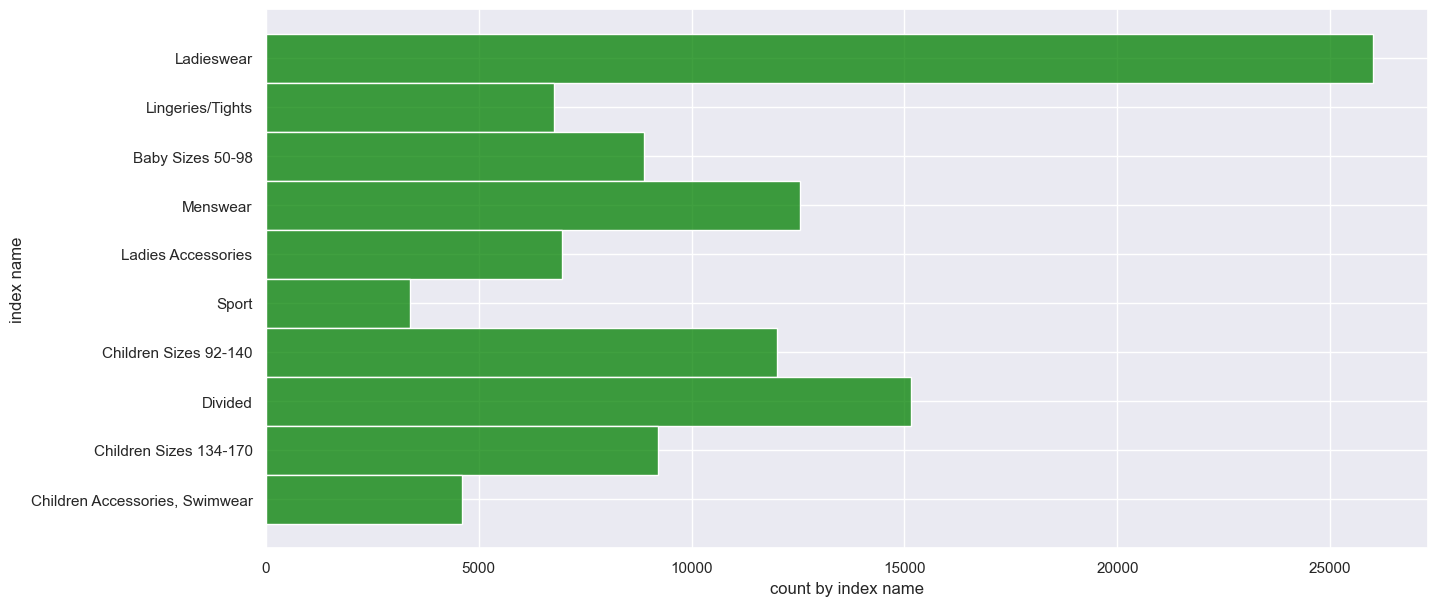

In [79]:
plt.figure(figsize=(15, 7))
sns.histplot(data=articles, y='index_name', color='green')
plt.xlabel('count by index name')
plt.ylabel('index name')
plt.show()

여성복이 가장 많은 비중을 차지하는 것과 스포츠웨어가 가장 적은 비중을 차지하는 것을 확인 할 수 있다. 

다음으로, index_group과 garment_group_name을 기준으로 분류하였다. 

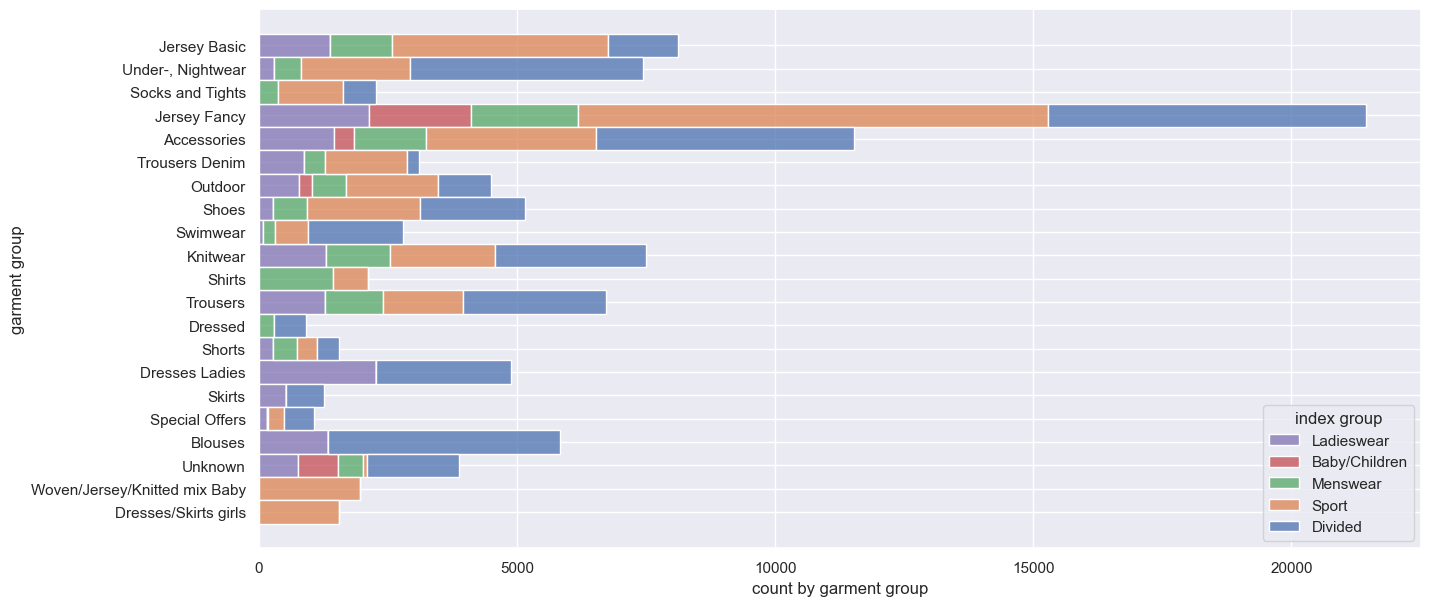

In [80]:
plt.subplots(figsize=(15, 7))
sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple="stack")
plt.legend(title='index group', labels=['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'])
plt.xlabel('count by garment group')
plt.ylabel('garment group');
plt.show()

jersey Fancy 의 비중이 가장 높은 것을 확인 할 수 있다. 

마지막으로, 각 열의 고유값 개수를 확인해보면 다음과 같다.

In [81]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


### Customers 

- customer_id: 각 고객의 고유 id
- FN: 1 or missed
- Active: 1 or missed
- club_member_status: 클럽 멤버 상태
- fashion_news_frequency: H&M이 고객에게 소식을 보내는 빈도
- age: 현재 나이
- postal_code: 고객의 우편번호

In [82]:
customers.shape

(1371980, 7)

In [74]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


customers 데이터에 중복이 없는 것을 확인하였다.

In [48]:
customers.shape[0] - customers['customer_id'].nunique()

0

고객의 나이 분포는 다음과 같다. 20대의 고객이 가장 많은 수를 차지하고 있다.

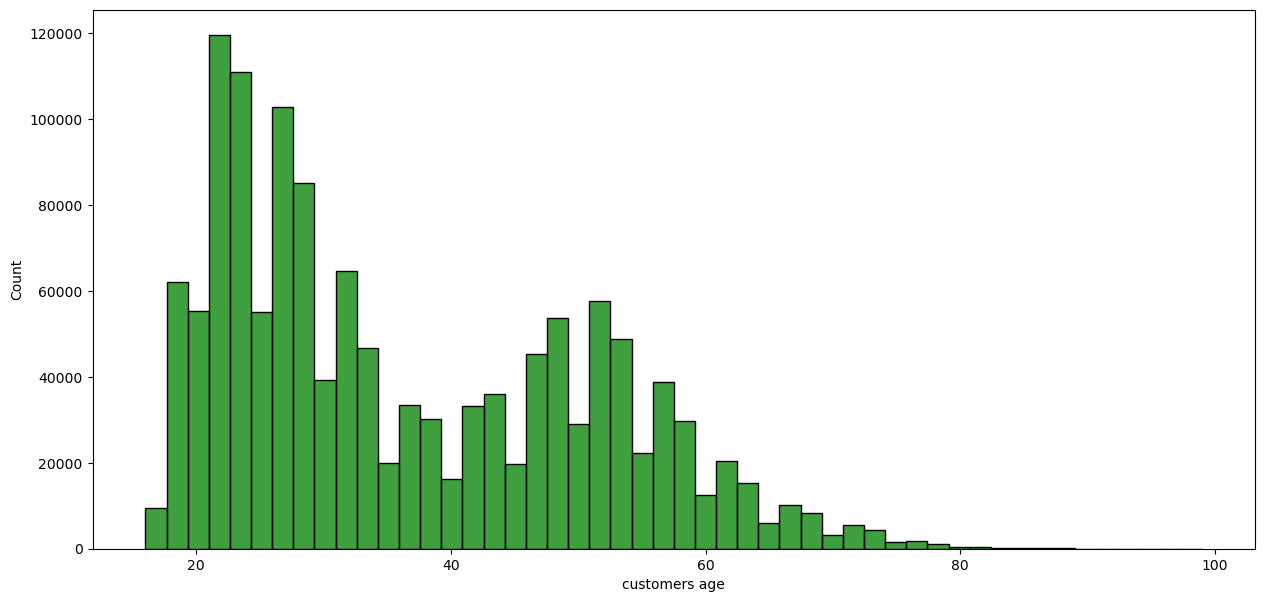

In [59]:
plt.subplots(figsize=(15,7))
sns.histplot(data=customers, x='age', bins=50, color='green')
plt.xlabel('customers age')
plt.show()

club_member_status의 활성화 분포는 다음과 같다. 소수를 제외한 고객이 active 한 것을 확인 할 수 있다.

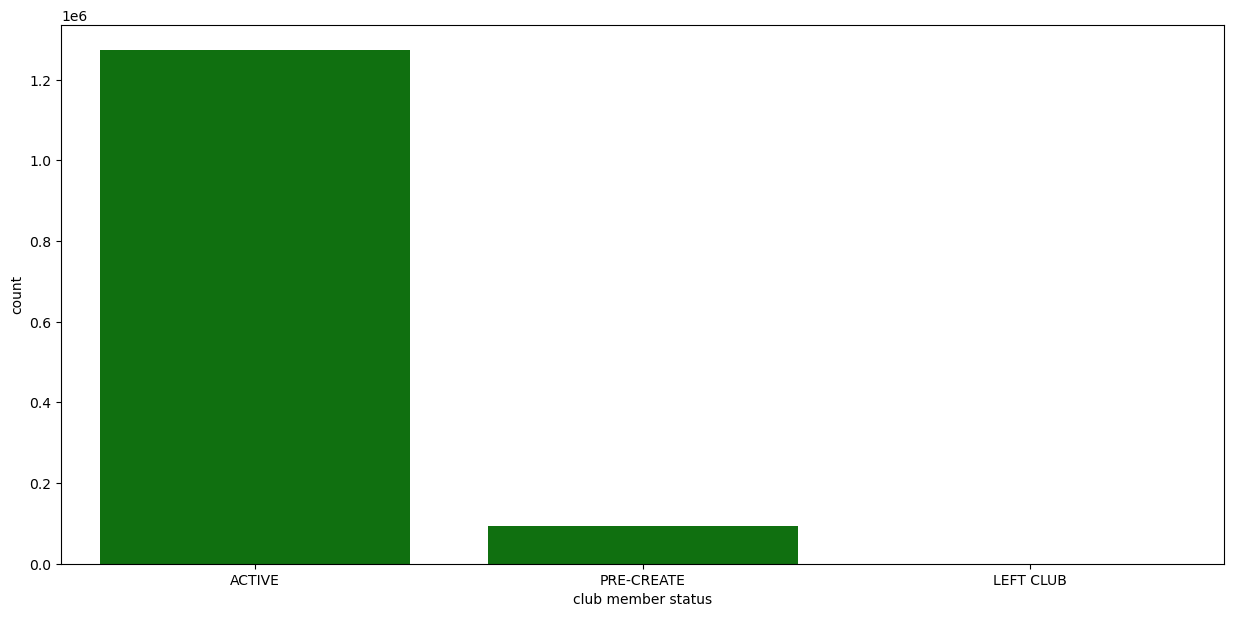

In [60]:
plt.subplots(figsize=(15,7))
sns.countplot(data=customers, color='green', x='club_member_status')
plt.xlabel('club member status')
plt.show()

우편번호(postal_code)별로 그룹화하여 각 그룹의 고객 수를 세보았다. 'customer_id' 열을 기준으로 내림차순으로 정렬하였다.

한 우편번호에 120303명의 고객이 있는 것을 확인 할 수 있다. 이는 Null 값의 기분 주소 이거나 배송 센터 주소 일 것을 추측해볼 수 있다.

In [83]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


### Transactions

- `t_dat`: 거래 날짜
- `customer_id`: 고객 id
- `article_id`: article id
- `price`: 구매 가격
- `sales_channel_id`: 1 또는 2 

In [84]:
transactions.shape

(31788324, 5)

In [85]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


거래 데이터는 2018년도 9월 20일 부터 2020년 9월 22일 데이터까지 있는 것을 알 수 있다. 

In [87]:
transactions.tail(1)

,t_dat,customer_id,article_id,price,sales_channel_id
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2



수집된 데이터는 2018년 9월부터 시작하여 2020년 12월까지 있다. 1년 내의(연중) 패턴을 보면 6월 까지 동안 구매가 증가하는 전반적인 패턴이 있으며, 6월에 최대 값을 찍은 후 이후 12월까지 6개월 동안 급격히 감소하는 경향이 있다. 

[Text(0.5, 1.0, 'Purchases over the years 2018-2020')]

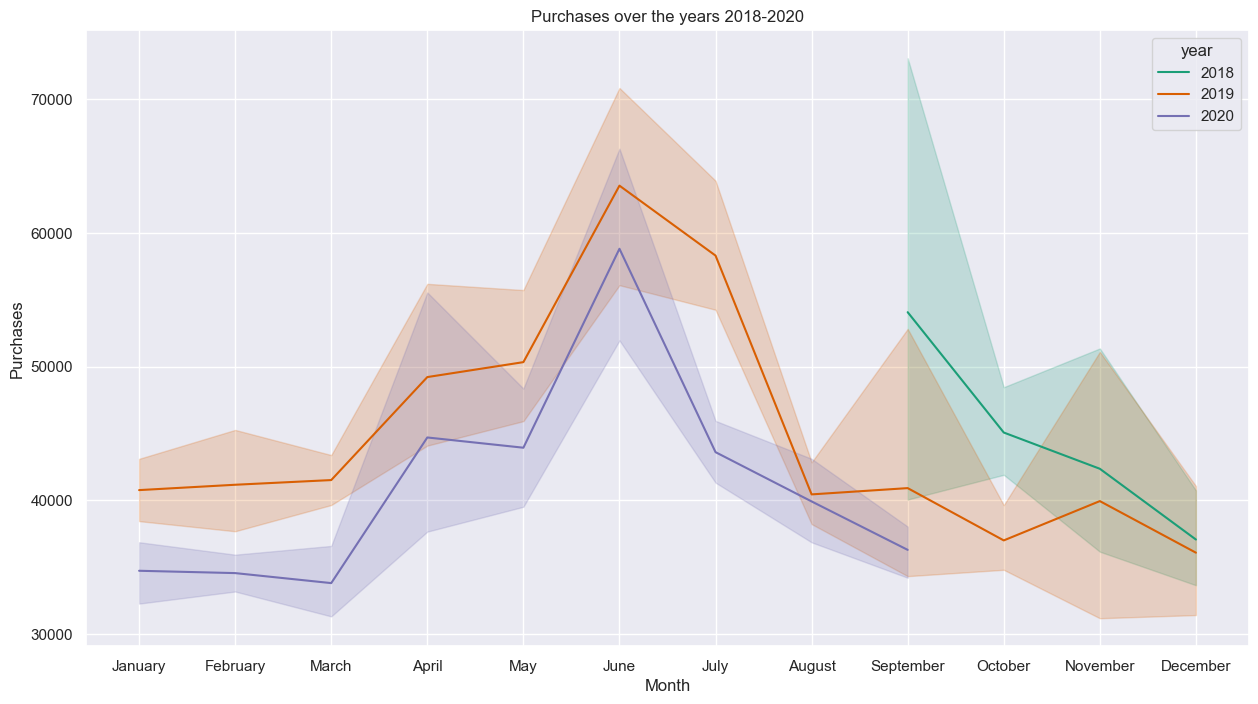

In [88]:
sns.set(rc = {'figure.figsize':(15,8)})
y_original = transactions['t_dat'].value_counts().rename_axis('date').reset_index(name='Purchases')
y_original["Period"] = pd.to_datetime(y_original["date"])
y_original = y_original.set_index("Period")
y_original["year"] = y_original.index.year
y_original["Month"] = y_original.index.month_name()
y_original["month_number"] = y_original.index.month
y_original = y_original.sort_values('month_number')
y_original.head()
sns.lineplot(x="Month", y="Purchases", data=y_original, hue="year", palette="Dark2").set(title='Purchases over the years 2018-2020')

### Images (with description and price)

In [89]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values(
    'price', ascending=False).iloc[:5][['article_id', 'price']]
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values(
    'price', ascending=True).iloc[:5][['article_id', 'price']]

가장 높은 가격을 가지고 있는 아이템 5개의 이미지

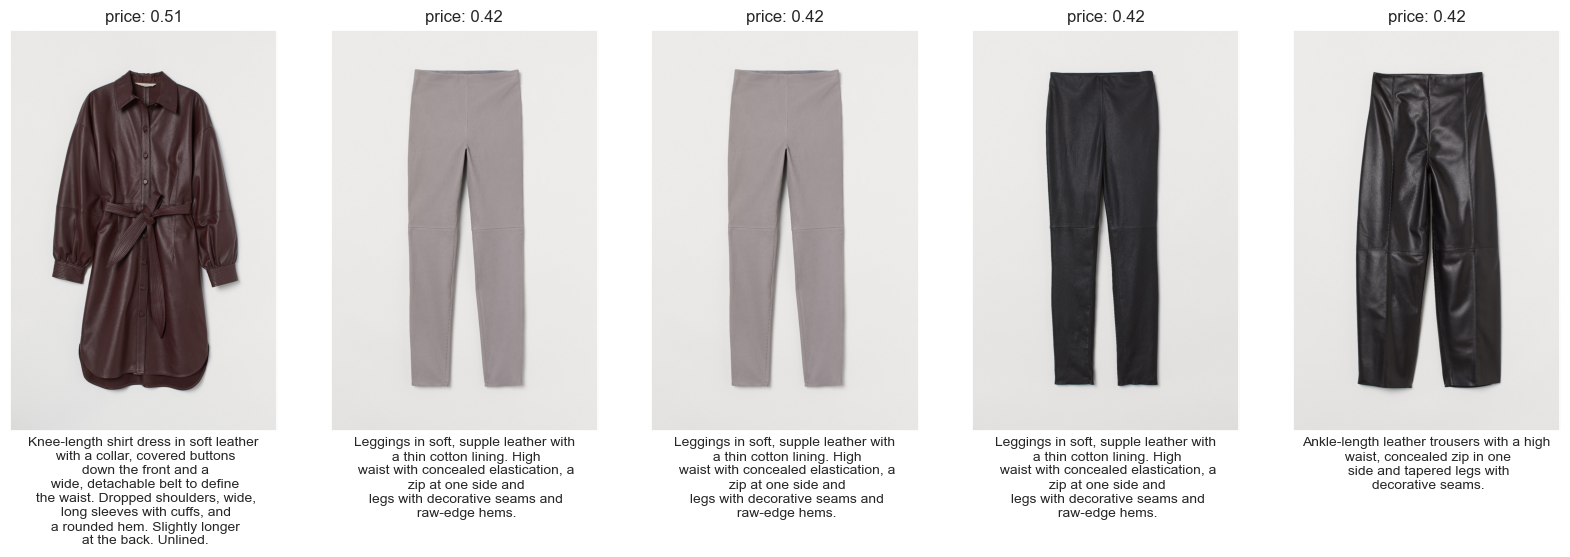

In [90]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'./h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10)
    i += 1
plt.show()

가장 낮은 가격을 가지고 있는 아이템 5개의 이미지

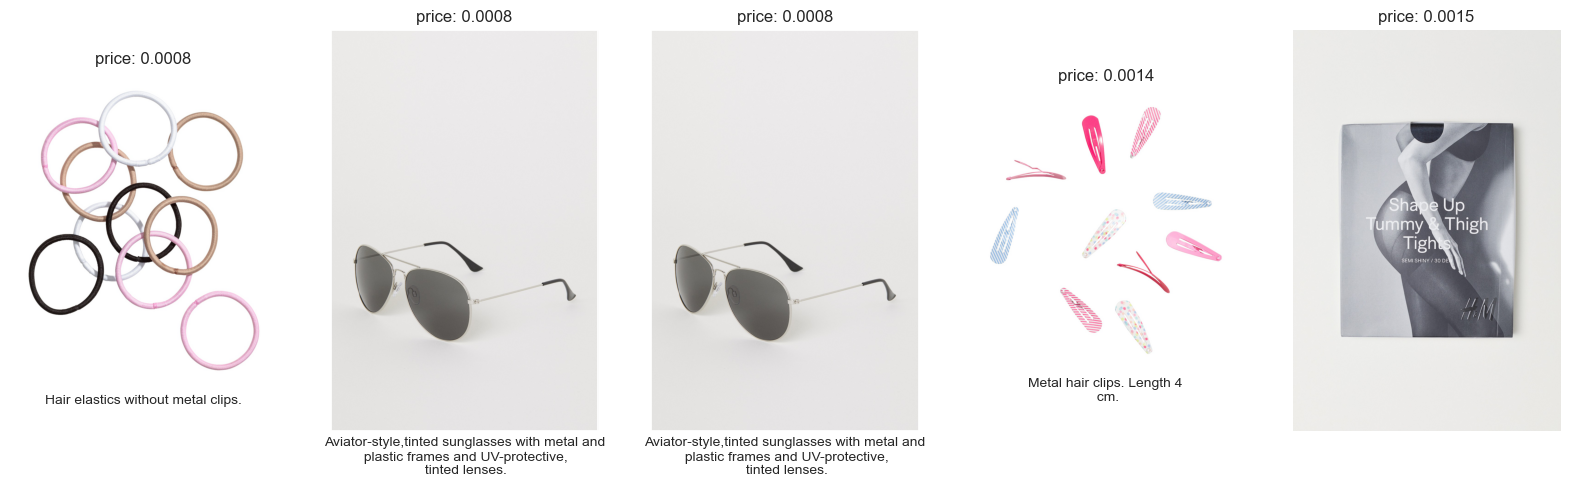

In [91]:
f, ax = plt.subplots(1, 5, figsize=(20,10))
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'./h-and-m-personalized-fashion-recommendations/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}')
    ax[i].set_xlabel(desc, fontsize=10)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()